In [1]:

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model, datasets
 
import pandas as pd

In [2]:

iris = datasets.load_iris()   

iris_dataset = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_dataset['target'] = pd.Series(iris.target)

iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:

print(iris_dataset.target.unique())

iris_dataset.describe()

[0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# Masking iris_dataset to get the number of rows corresponding to target variable 0,1,2 
df0  = iris_dataset[iris_dataset.target == 0]
df1  = iris_dataset[iris_dataset.target == 1]
df2  = iris_dataset[iris_dataset.target == 2]

print('Number of rows corresponding to 0: ', len(df0))
print('Number of rows corresponding to 1: ', len(df1))
print('Number of rows corresponding to 2: ', len(df2))

Number of rows corresponding to 0:  50
Number of rows corresponding to 1:  50
Number of rows corresponding to 2:  50


In [5]:

X = iris.data[:, :2] 

Y = iris.target

In [6]:

log_reg = linear_model.LogisticRegression(C=1e5)
log_reg.fit(X,Y)

LogisticRegression(C=100000.0)

In [7]:
# Step size in the mesh
h = .01 

# Create the decision boundary
# For that, we will assign a color to each Point in the mesh [x_min, x_max] [y_min, y_max]
# Take the endpoints of the X variable
x_min, x_max = X[:, 0].min() - 3.5, X[:, 0].max() + 3.5 
# Take the endpoints of the Y variable
y_min, y_max = X[:, 0].min() - 3.5, X[:, 0].max() + 3.5  

# Create a mesh using np.mesh function so that we can easily see the classified results under different mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [8]:
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z

array([0, 0, 0, ..., 0, 0, 0])

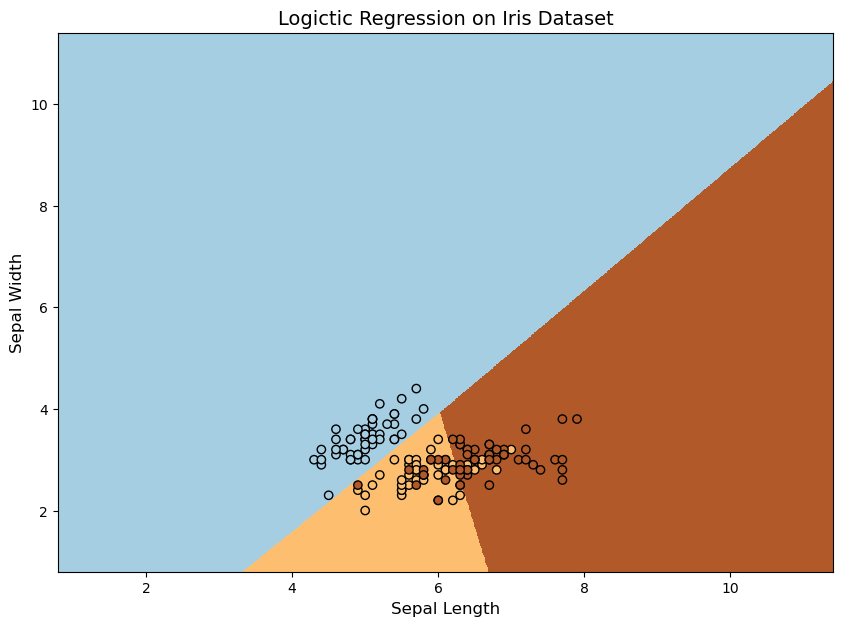

In [9]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.title('Logictic Regression on Iris Dataset', fontsize=14)

plt.show()